# G3Py: Generalized Graphical Gaussian Processes in Python

## Imports and Sunspots Dataset

/opt/anaconda3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.

Total: 309 | Obs: 30 (9.70873786407767%)


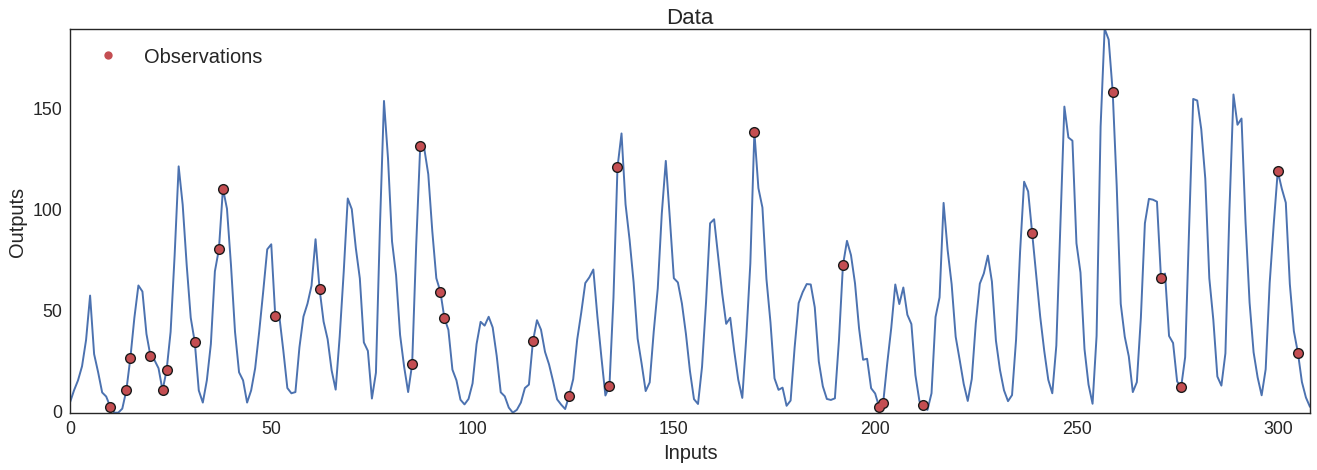

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import g3py as g3
import pymc3 as pm
import theano as th
import theano.tensor as tt

g3.style_normal()
g3.style_widget()

psamples = 0.1
data = 'subspots'


if data == 'subspots':
    x, y = g3.data_sunspots()
else:
    x, y = g3.data_heart()


obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, psamples, plot=True)

## Define Prior Distribution

WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


{'GP_Bias_Bias': 0.5,
 'GP_Noise_var_log_': array(-1.3862943649291992, dtype=float32),
 'GP_SE_rate_log_': array([-0.69314718], dtype=float32),
 'GP_SE_var_log_': array(-1.3862943649291992, dtype=float32)}
array(0.0, dtype=float32)


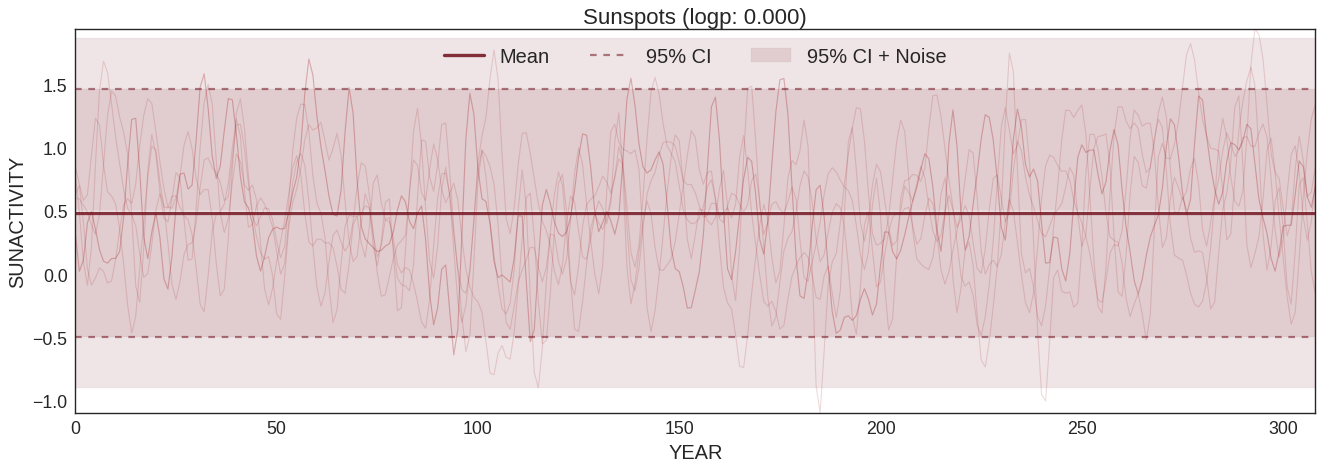

In [2]:
gp = g3.GaussianProcess(space=x, location=g3.Bias(), kernel=g3.SE(), noisy=True)
gp.describe('Sunspots', 'YEAR', 'SUNACTIVITY')
gp.plot(samples=5)
g3.print(gp.params, gp.logp(gp.params))

## Default Posterior Distribution, given observations (automatic parameters)

{'GP_Bias_Bias': 52.606667,
 'GP_Noise_var_log_': array(7.650064468383789, dtype=float32),
 'GP_SE_rate_log_': array([-3.01282668], dtype=float32),
 'GP_SE_var_log_': array(7.650064468383789, dtype=float32)}
array(-158.93557739257812, dtype=float32)
{'_l1': 33.654343294557243, '_l2': 1677.5122306557669}


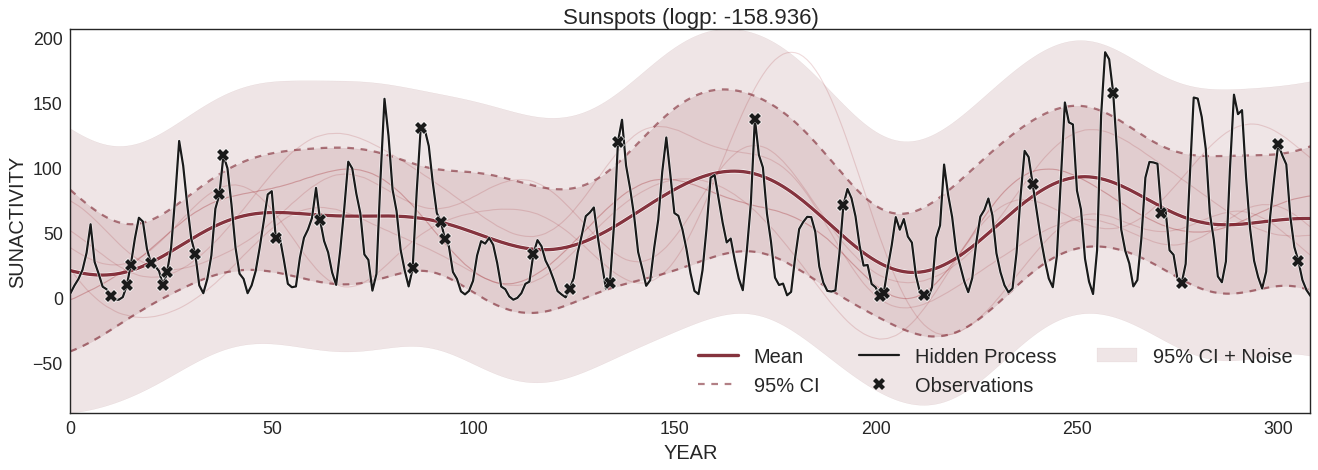

In [3]:
gp.observed(inputs=x_obs, outputs=y_obs, hidden=y)
gp.plot(samples=5)
g3.print(gp.params, gp.logp(gp.params), gp.scores(gp.params))

## Manual Search of parameters

In [4]:
gp.widget(samples=5)

## Change style and get widget params

{'GP_Bias_Bias': 52.606667,
 'GP_Noise_var': array([ 2100.78100586], dtype=float32),
 'GP_Noise_var_log_': array(7.650064468383789, dtype=float32),
 'GP_SE_rate': array([ 0.04915254], dtype=float32),
 'GP_SE_rate_log_': array([-3.01282668], dtype=float32),
 'GP_SE_var': array([ 2100.78100586], dtype=float32),
 'GP_SE_var_log_': array(7.650064468383789, dtype=float32),
 '_l1': 33.654343294557243,
 '_l2': 1677.5122306557669,
 '_ll': array(-158.93557739257812, dtype=float32)}

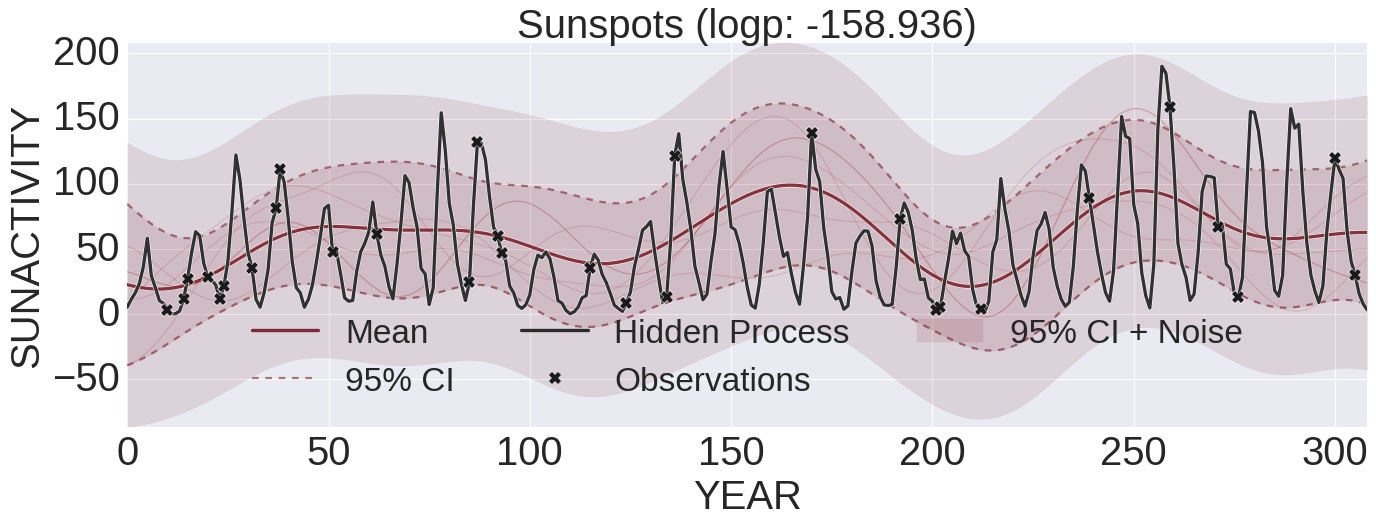

In [5]:
g3.style_big_seaborn()
gp.plot(gp.params_widget, samples=5)
gp.eval_params(gp.params_widget)

## Default find_MAP with derivative methods and free-derivative methods

In [6]:
params_map = gp.find_MAP(points=2)

'Starting function value (-logp): 159.122'
'start_bfgs'
         Current function value: 156.362579
         Iterations: 10
         Function evaluations: 87
         Gradient evaluations: 75
'start_powell'
Optimization terminated successfully.
         Current function value: 156.349670
         Iterations: 3
         Function evaluations: 173
'find_MAP'
{'GP_Bias_Bias': array(51.06968307495117, dtype=float32),
 'GP_Noise_var_log_': array(7.505660057067871, dtype=float32),
 'GP_SE_rate_log_': array([-0.56569731], dtype=float32),
 'GP_SE_var_log_': array(5.272409439086914, dtype=float32)}


{'GP_Bias_Bias': array(51.06968307495117, dtype=float32),
 'GP_Noise_var': array([ 1818.30505371], dtype=float32),
 'GP_Noise_var_log_': array(7.505660057067871, dtype=float32),
 'GP_SE_rate': array([ 0.56796396], dtype=float32),
 'GP_SE_rate_log_': array([-0.56569731], dtype=float32),
 'GP_SE_var': array([ 194.88496399], dtype=float32),
 'GP_SE_var_log_': array(5.272409439086914, dtype=float32),
 '_l1': 32.034044652154918,
 '_l2': 1538.7243314246921,
 '_ll': array(-156.34967041015625, dtype=float32)}


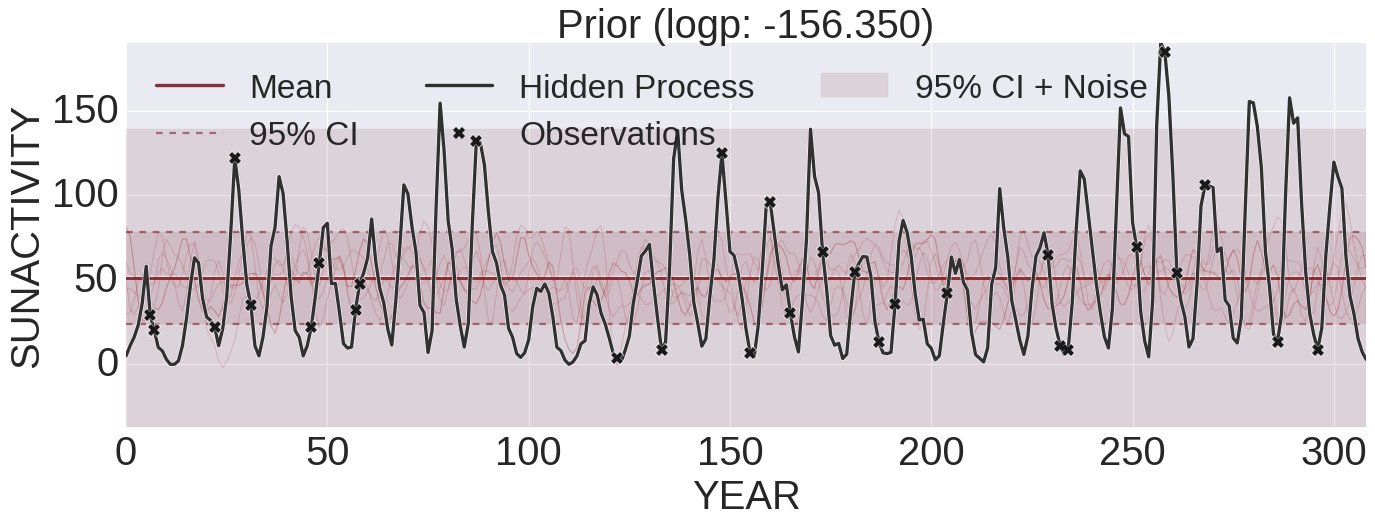

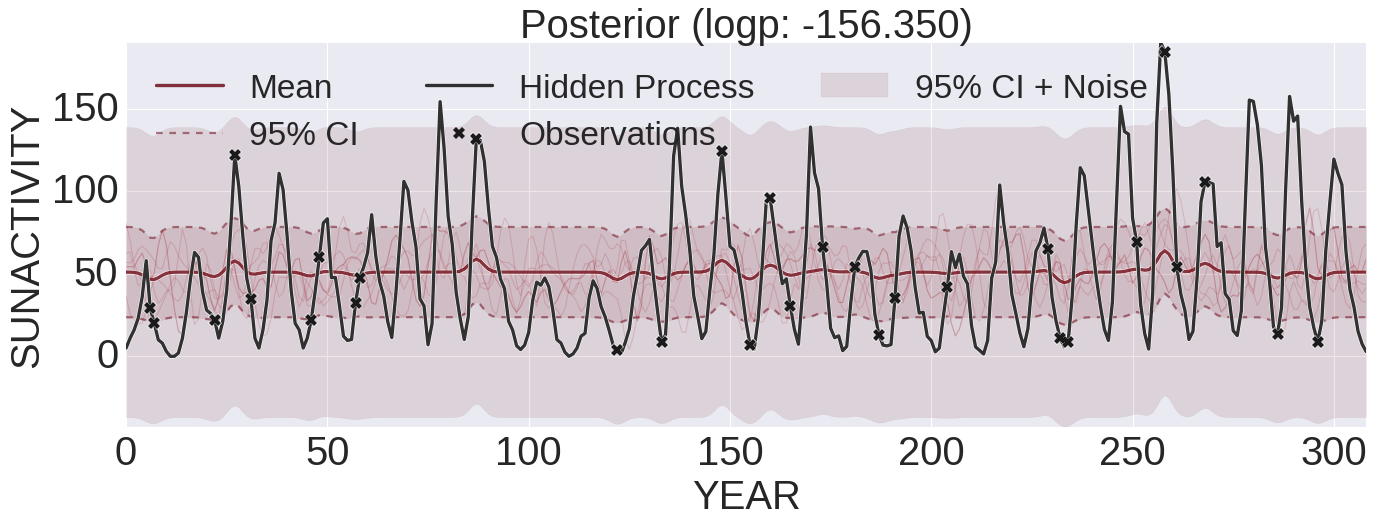

In [7]:
g3.print(gp.eval_params(params_map))
gp.plot(params_map, samples=5, prior=True, title='Prior')
g3.show()
gp.plot(params_map, samples=5, title='Posterior')
g3.show()

## Find MAP from random points

{'GP_Bias_Bias': array(58.02726364135742, dtype=float32),
 'GP_Noise_var': array([ 1456.33044434], dtype=float32),
 'GP_Noise_var_log_': array(7.283675193786621, dtype=float32),
 'GP_SE_rate': array([ 0.10799819], dtype=float32),
 'GP_SE_rate_log_': array([-2.22564077], dtype=float32),
 'GP_SE_var': array([ 694.91821289], dtype=float32),
 'GP_SE_var_log_': array(6.54379415512085, dtype=float32),
 '_l1': 33.056449717302542,
 '_l2': 1577.6979846649888,
 '_ll': array(-156.68536376953125, dtype=float32)}


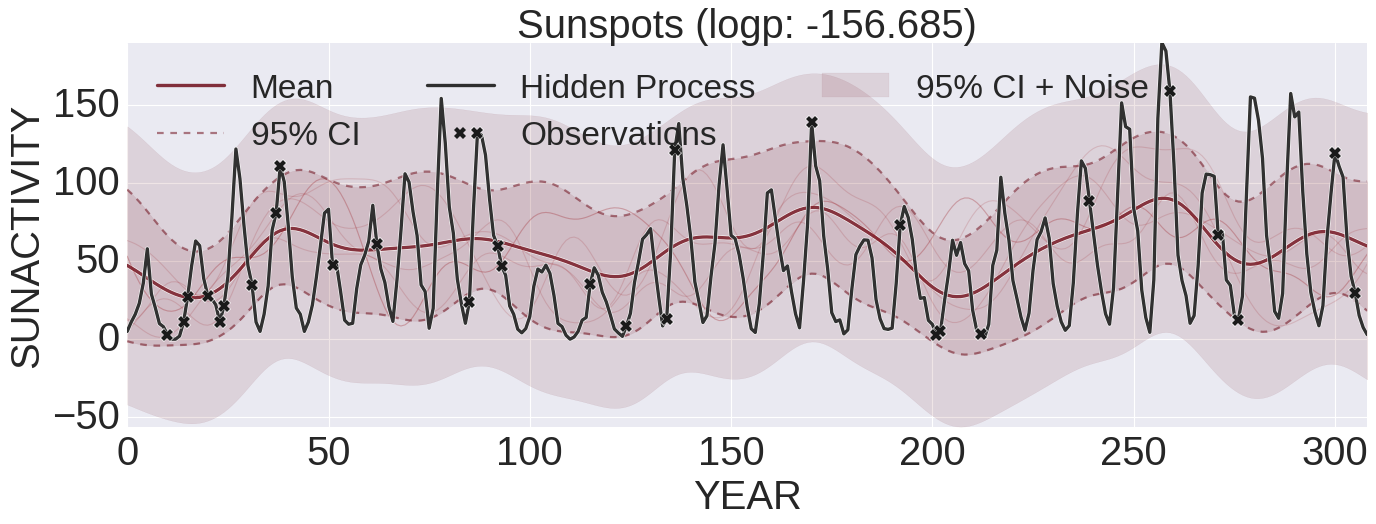

{'GP_Bias_Bias': array(54.56752014160156, dtype=float32),
 'GP_Noise_var': array([ 3.9801259], dtype=float32),
 'GP_Noise_var_log_': array(1.381313443183899, dtype=float32),
 'GP_SE_rate': array([ 0.77318513], dtype=float32),
 'GP_SE_rate_log_': array([-0.25723678], dtype=float32),
 'GP_SE_var': array([ 2114.84814453], dtype=float32),
 'GP_SE_var_log_': array(7.65673828125, dtype=float32),
 '_l1': 25.440783408698909,
 '_l2': 1131.6470559255183,
 '_ll': array(-155.40196228027344, dtype=float32)}


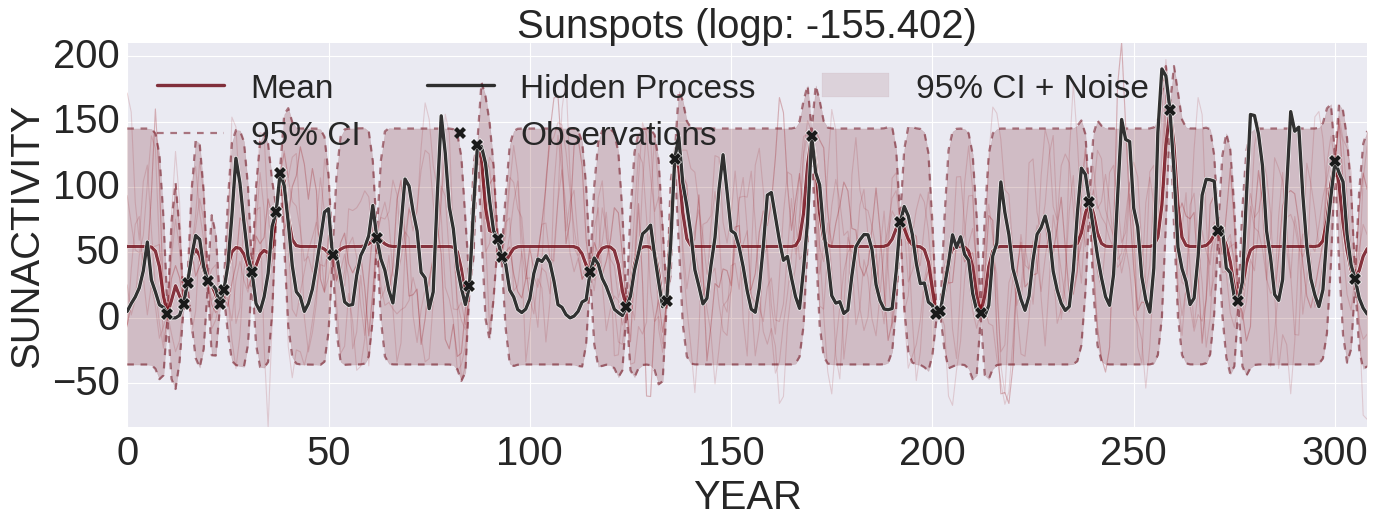

{'GP_Bias_Bias': array(58.03142166137695, dtype=float32),
 'GP_Noise_var': array([ 1456.16040039], dtype=float32),
 'GP_Noise_var_log_': array(7.283558368682861, dtype=float32),
 'GP_SE_rate': array([ 0.10803466], dtype=float32),
 'GP_SE_rate_log_': array([-2.22530317], dtype=float32),
 'GP_SE_var': array([ 694.56274414], dtype=float32),
 'GP_SE_var_log_': array(6.543282508850098, dtype=float32),
 '_l1': 33.056816076383619,
 '_l2': 1577.6907937583042,
 '_ll': array(-156.68536376953125, dtype=float32)}


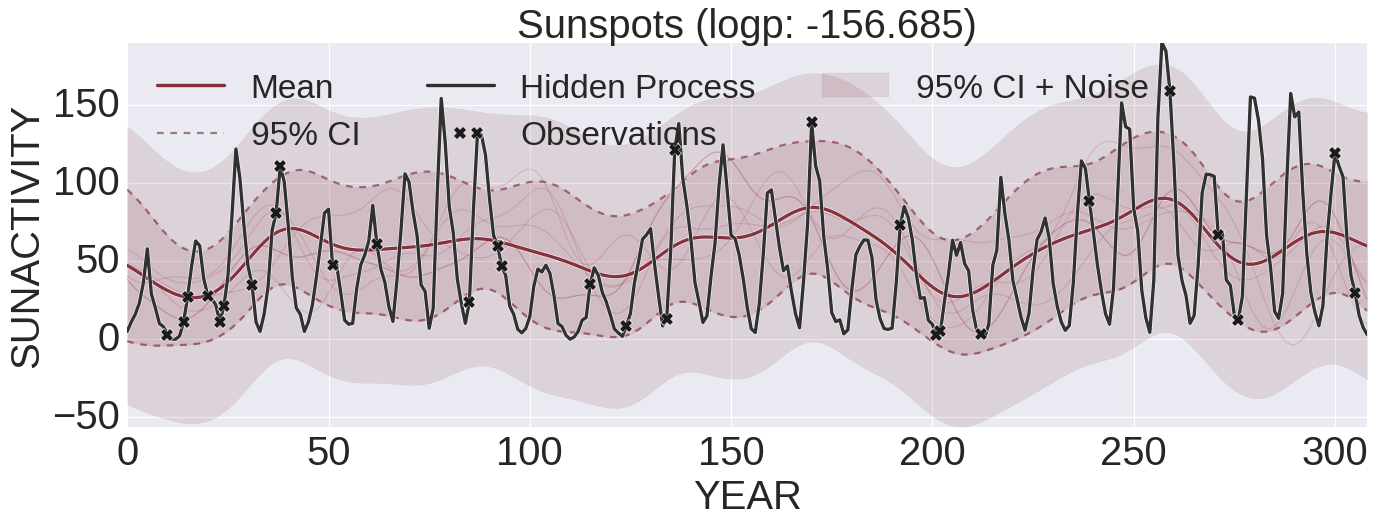

{'GP_Bias_Bias': array(58.029502868652344, dtype=float32),
 'GP_Noise_var': array([ 1456.21801758], dtype=float32),
 'GP_Noise_var_log_': array(7.283597946166992, dtype=float32),
 'GP_SE_rate': array([ 0.10798957], dtype=float32),
 'GP_SE_rate_log_': array([-2.22572064], dtype=float32),
 'GP_SE_var': array([ 694.66210938], dtype=float32),
 'GP_SE_var_log_': array(6.543425559997559, dtype=float32),
 '_l1': 33.056762849628733,
 '_l2': 1577.7002514939763,
 '_ll': array(-156.68536376953125, dtype=float32)}


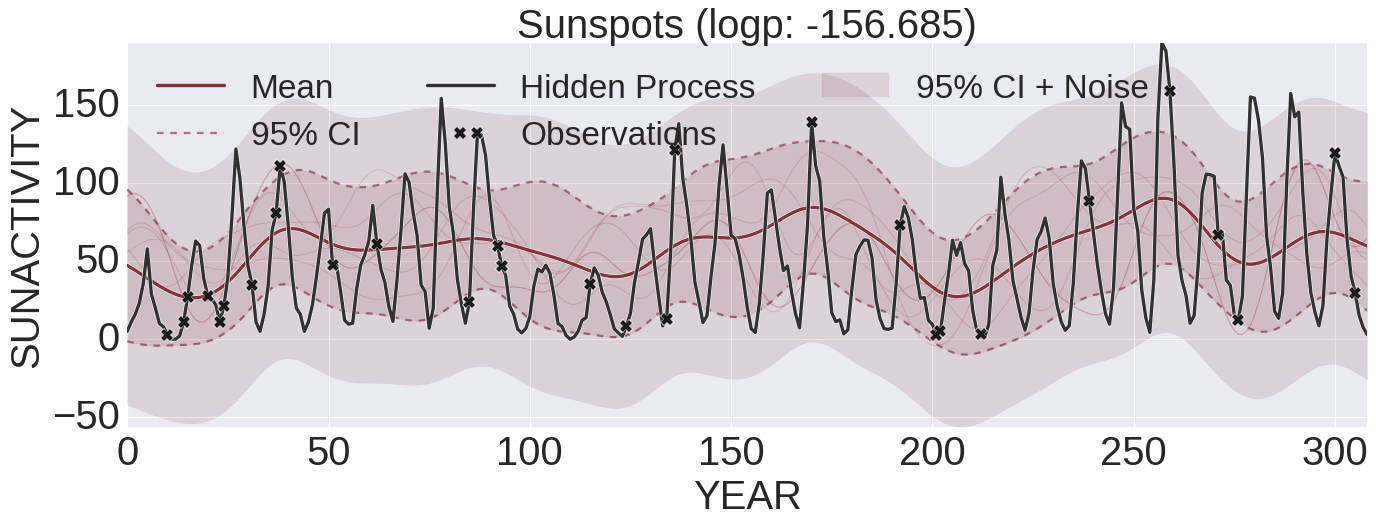

{'GP_Bias_Bias': array(58.00873565673828, dtype=float32),
 'GP_Noise_var': array([ 1456.30554199], dtype=float32),
 'GP_Noise_var_log_': array(7.283658027648926, dtype=float32),
 'GP_SE_rate': array([ 0.10800808], dtype=float32),
 'GP_SE_rate_log_': array([-2.22554922], dtype=float32),
 'GP_SE_var': array([ 694.68829346], dtype=float32),
 'GP_SE_var_log_': array(6.543463230133057, dtype=float32),
 '_l1': 33.053160843339938,
 '_l2': 1577.4652009214535,
 '_ll': array(-156.68536376953125, dtype=float32)}


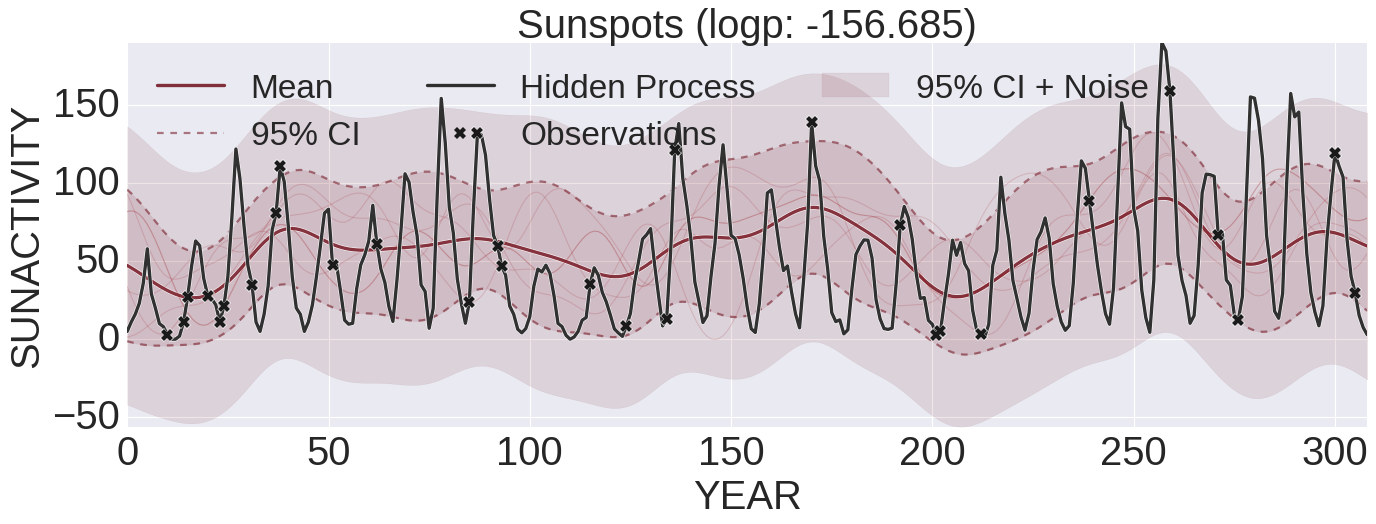

In [6]:
for k in range(5):
    init_params = gp.params_random(gp.params_widget, sigma=0.2)
    params = gp.find_MAP(init_params, points=2, display=False)
    g3.print(gp.eval_params(params))
    gp.plot(params, samples=5)
    g3.show()

## Get prediction and custom plot

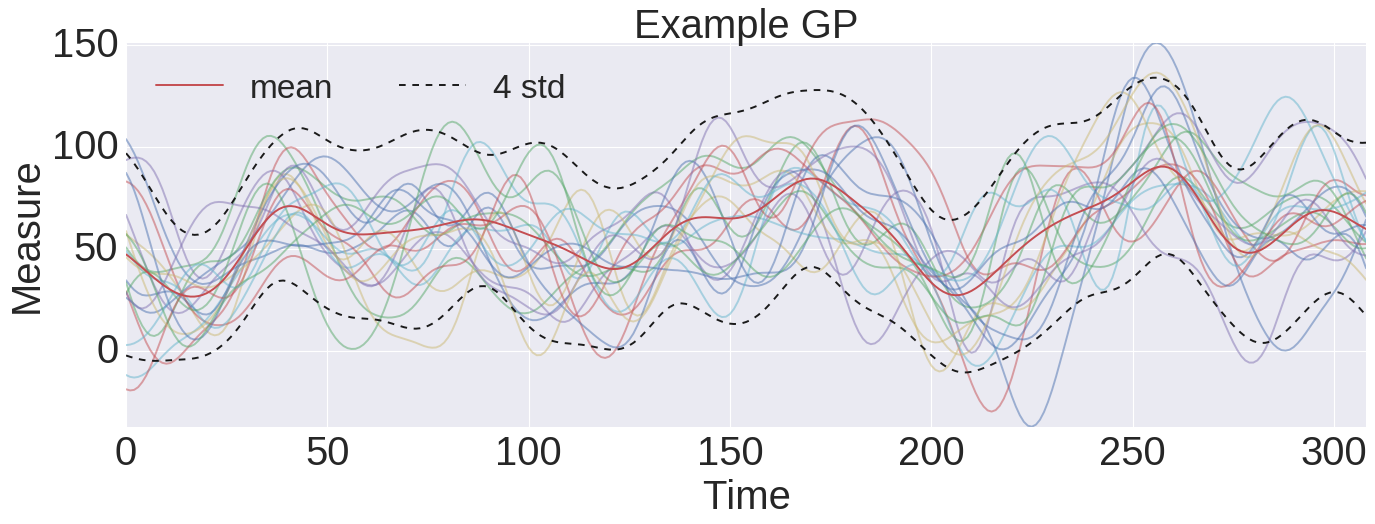

In [7]:
prediction = gp.predict(params, samples=20)
mu, std, samples = prediction.mean, prediction.std, prediction.samples
g3.plot(samples, alpha=0.5)
g3.plot(mu, 'r', label='mean')
g3.plot(mu + 2*std, '--k', label='4 std')
g3.plot(mu - 2*std, '--k')
g3.plot_text('Example GP', 'Time', 'Measure')
g3.plot_save('images/gp_sunspots3.pdf')

# Sampling Hyperparameters with Ensemble MCMC

In [10]:
datatrace = gp.sample_hypers(start=params, samples=10000, chains=10)
datatrace

Sampling 4 variables, 10 chains, 10000 times (None temps)




  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 22/10000 [00:00<00:45, 218.95it/s]

  1%|          | 51/10000 [00:00<00:42, 235.74it/s]

  1%|          | 78/10000 [00:00<00:40, 244.61it/s]

  1%|          | 105/10000 [00:00<00:39, 250.33it/s]

  1%|▏         | 132/10000 [00:00<00:38, 255.48it/s]

  2%|▏         | 159/10000 [00:00<00:38, 256.84it/s]

  2%|▏         | 187/10000 [00:00<00:37, 262.39it/s]

  2%|▏         | 212/10000 [00:00<00:39, 248.79it/s]

  2%|▏         | 241/10000 [00:00<00:37, 256.88it/s]

  3%|▎         | 270/10000 [00:01<00:36, 263.64it/s]

  3%|▎         | 298/10000 [00:01<00:36, 265.54it/s]

  3%|▎         | 325/10000 [00:01<00:37, 259.00it/s]

  4%|▎         | 352/10000 [00:01<00:37, 259.82it/s]

  4%|▍         | 379/10000 [00:01<00:36, 262.41it/s]

  4%|▍         | 409/10000 [00:01<00:35, 269.72it/s]

  4%|▍         | 436/10000 [00:01<00:36, 265.19it/s]

  5%|▍         | 466/10000 [00:01<00:35, 271.52it/s]

  5%|▍         | 494/10000 [00:01<00:35,

 37%|███▋      | 3739/10000 [00:14<00:23, 262.60it/s]

 38%|███▊      | 3766/10000 [00:14<00:23, 263.21it/s]

 38%|███▊      | 3793/10000 [00:14<00:23, 265.16it/s]

 38%|███▊      | 3822/10000 [00:14<00:22, 269.88it/s]

 38%|███▊      | 3850/10000 [00:14<00:23, 266.10it/s]

 39%|███▉      | 3877/10000 [00:14<00:23, 263.20it/s]

 39%|███▉      | 3906/10000 [00:14<00:22, 269.52it/s]

 39%|███▉      | 3935/10000 [00:14<00:22, 270.41it/s]

 40%|███▉      | 3964/10000 [00:14<00:22, 271.95it/s]

 40%|███▉      | 3992/10000 [00:15<00:21, 273.82it/s]

 40%|████      | 4020/10000 [00:15<00:22, 271.62it/s]

 40%|████      | 4049/10000 [00:15<00:21, 273.83it/s]

 41%|████      | 4078/10000 [00:15<00:21, 278.45it/s]

 41%|████      | 4107/10000 [00:15<00:21, 279.58it/s]

 41%|████▏     | 4135/10000 [00:15<00:21, 276.59it/s]

 42%|████▏     | 4163/10000 [00:15<00:21, 271.47it/s]

 42%|████▏     | 4191/10000 [00:15<00:21, 273.14it/s]

 42%|████▏     | 4219/10000 [00:15<00:21, 272.08it/s]

 42%|████▏

 74%|███████▍  | 7382/10000 [00:28<00:09, 266.22it/s]

 74%|███████▍  | 7410/10000 [00:28<00:09, 267.94it/s]

 74%|███████▍  | 7439/10000 [00:28<00:09, 273.34it/s]

 75%|███████▍  | 7467/10000 [00:28<00:09, 273.54it/s]

 75%|███████▍  | 7495/10000 [00:28<00:09, 270.39it/s]

 75%|███████▌  | 7524/10000 [00:28<00:09, 273.07it/s]

 76%|███████▌  | 7552/10000 [00:28<00:08, 272.59it/s]

 76%|███████▌  | 7580/10000 [00:28<00:08, 270.58it/s]

 76%|███████▌  | 7609/10000 [00:28<00:08, 274.29it/s]

 76%|███████▋  | 7638/10000 [00:28<00:08, 275.96it/s]

 77%|███████▋  | 7668/10000 [00:29<00:08, 280.64it/s]

 77%|███████▋  | 7697/10000 [00:29<00:08, 278.40it/s]

 77%|███████▋  | 7725/10000 [00:29<00:08, 275.51it/s]

 78%|███████▊  | 7755/10000 [00:29<00:07, 280.96it/s]

 78%|███████▊  | 7784/10000 [00:29<00:07, 283.10it/s]

 78%|███████▊  | 7813/10000 [00:29<00:07, 282.16it/s]

 78%|███████▊  | 7842/10000 [00:29<00:07, 279.27it/s]

 79%|███████▊  | 7871/10000 [00:29<00:07, 279.32it/s]

 79%|█████

GP_Noise_var_log_  GP_SE_rate_log___0  GP_SE_var_log_  GP_Bias_Bias  \
0               7.939575           -2.370243        7.154118     59.347039   
1               7.939575           -2.370243        7.154118     59.347039   
2               7.939575           -2.370243        7.154118     59.347039   
3               7.846728           -2.393803        7.200963     59.165075   
4               7.870245           -2.388633        7.136890     58.951613   
5               8.012309           -2.357399        6.749831     57.662107   
6               8.024830           -2.354646        6.715717     57.548457   
7               8.024830           -2.354646        6.715717     57.548457   
8               7.865772           -2.485385        6.666734     63.467420   
9               7.997726           -2.527500        6.328678     66.921854   
10              7.997726           -2.527500        6.328678     66.921854   
11              7.947143           -2.651342        6.123711     64.739439   
12              8.019153           -2.475041        6.415502     67.846316   
13              8.019153           -2.475041        6.415502     67.846316   
14              8.024724           -2.476047        6.389396     67.307488   
15              8.024724           -2.476047        6.389396     67.307488   
16              8.024724           -2.476047        6.389396     67.307488   
17              8.024724           -2.476047        6.389396     67.307488   
18              7.673757           -1.234293        6.510704     64.229048   
19              7.674092           -1.235480        6.510588     64.231990   
20              7.671713           -1.241556        6.511834     64.292161   
21              7.446164           -0.413454        6.639798     62.485410   
22              7.400779            0.931062        7.200219     66.504826   
23              7.341850            1.240113        7.226829     67.903352   
24              7.472883           -1.685345        6.075477     58.841783   
25              7.472883           -1.685345        6.075477     58.841783   
26              7.427243           -1.899540        6.166193     61.469442   
27              7.234774           -1.083534        6.945537     68.726638   
28              7.168672           -0.803283        7.213197     71.219062   
29              7.879700           -2.500833        7.260510     75.315286   
...                  ...                 ...             ...           ...   
99970           7.638654           36.324107       -9.723099     60.036476   
99971           7.638654           36.324107       -9.723099     60.036476   
99972           7.656156           34.727049       -8.818177     59.607514   
99973           7.326878           35.790532       -5.409225     59.184099   
99974           7.326878           35.790532       -5.409225     59.184099   
99975           7.379110           32.581487       -5.720202     58.528008   
99976           7.296867           37.634425       -5.230539     59.561084   
99977           7.296867           37.634425       -5.230539     59.561084   
99978           7.296867           37.634425       -5.230539     59.561084   
99979           8.060844           36.444725      -13.317520     60.966077   
99980           8.060844           36.444725      -13.317520     60.966077   
99981           8.060844           36.444725      -13.317520     60.966077   
99982           8.060844           36.444725      -13.317520     60.966077   
99983           8.060844           36.444725      -13.317520     60.966077   
99984           8.060844           36.444725      -13.317520     60.966077   
99985           8.074382           40.352869      -13.338316     62.060141   
99986           7.814400           40.241518      -10.602402     61.441557   
99987           7.831671           33.554605      -10.992873     59.661087   
99988           7.831671           33.554605      -10.992873     59.661087   
99989           7.831671     

## Convergence Diagnostics

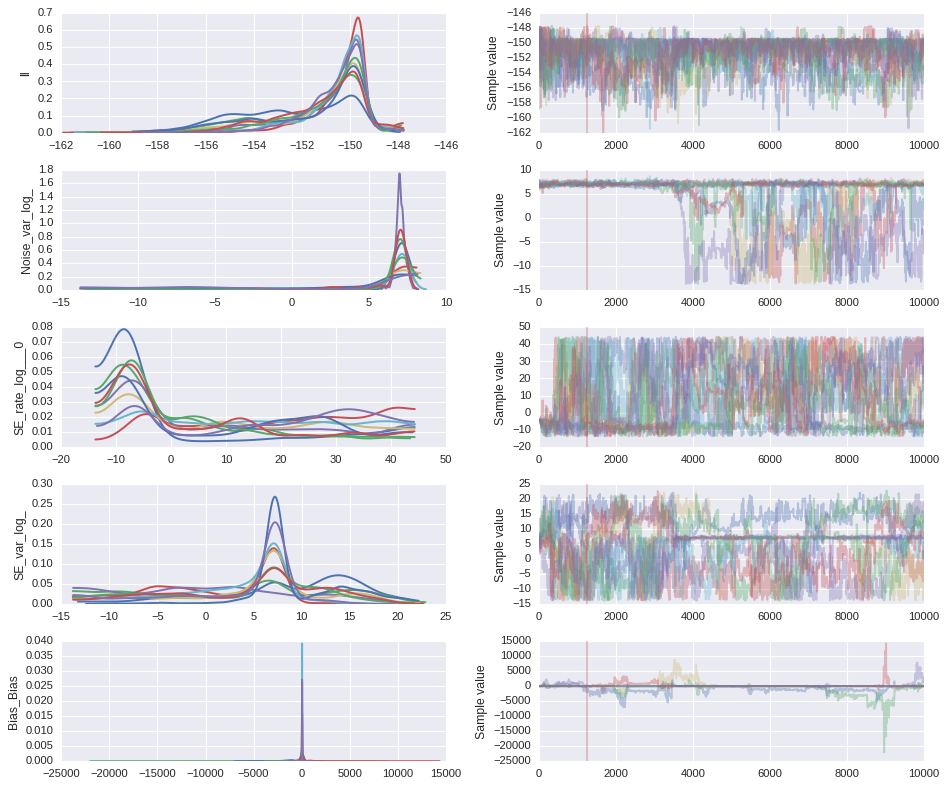

In [11]:
g3.style_seaborn()
g3.plot_datatrace(datatrace)

## Plot Marginals and reference parameters

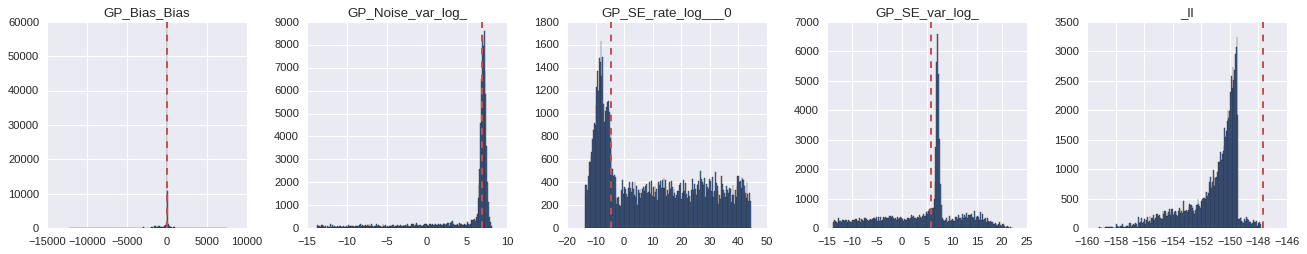

In [12]:
g3.hist_datatrace(datatrace, reference=gp.eval_params(params))

## Clustering of parameters and plot Bivariate distributions

In [13]:
g3.cluster_datatrace(gp, datatrace)

<function g3py.bayesian.average.cluster_datatrace.<locals>._cluster>

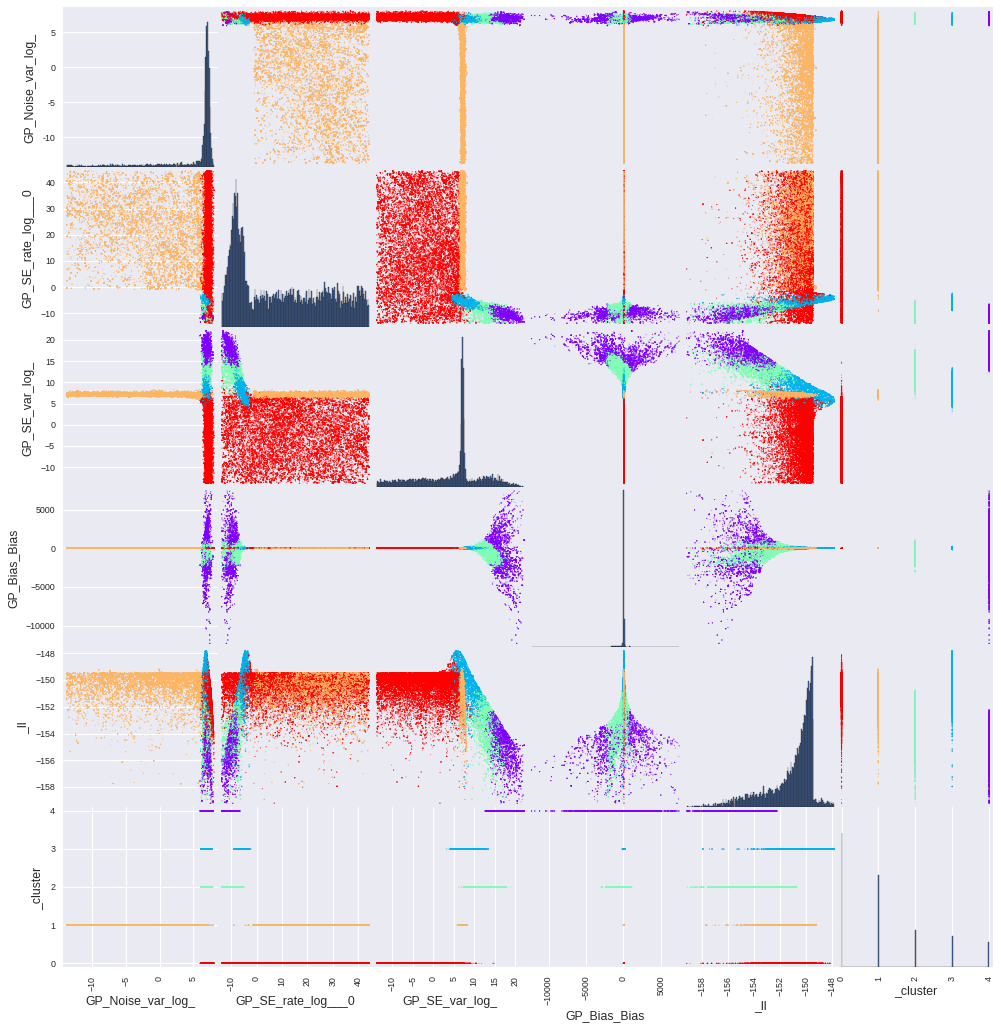

In [39]:
g3.scatter_datatrace(datatrace)

## Model Selection

In [22]:
candidates = g3.find_candidates(datatrace, ll=1, by_cluster=True)
candidates

GP_Noise_var_log_  GP_SE_rate_log___0  GP_SE_var_log_  \
ll[327]            -5.808135           -0.450763        7.371746   
ll[37556]           6.783098           -0.603469        6.689780   
ll[81787]           2.522598            1.026919        7.287875   
ll[39151]           7.332922           13.411404      -10.110332   
ll[77153]           7.474529           -8.725853        5.029757   

           GP_Bias_Bias  _nchain  _niter  _burnin  _outlayer         _ll  \
ll[327]       54.216008        0     327    False      False -150.301483   
ll[37556]     59.311322        3    7556     True       True -151.879639   
ll[81787]     55.986819        8    1787     True       True -152.455719   
ll[39151]     55.873643        3    9151     True       True -152.498901   
ll[77153]     68.418191        7    7153     True       True -153.669235   

           _cluster  
ll[327]           3  
ll[37556]         1  
ll[81787]         0  
ll[39151]         2  
ll[77153]         4

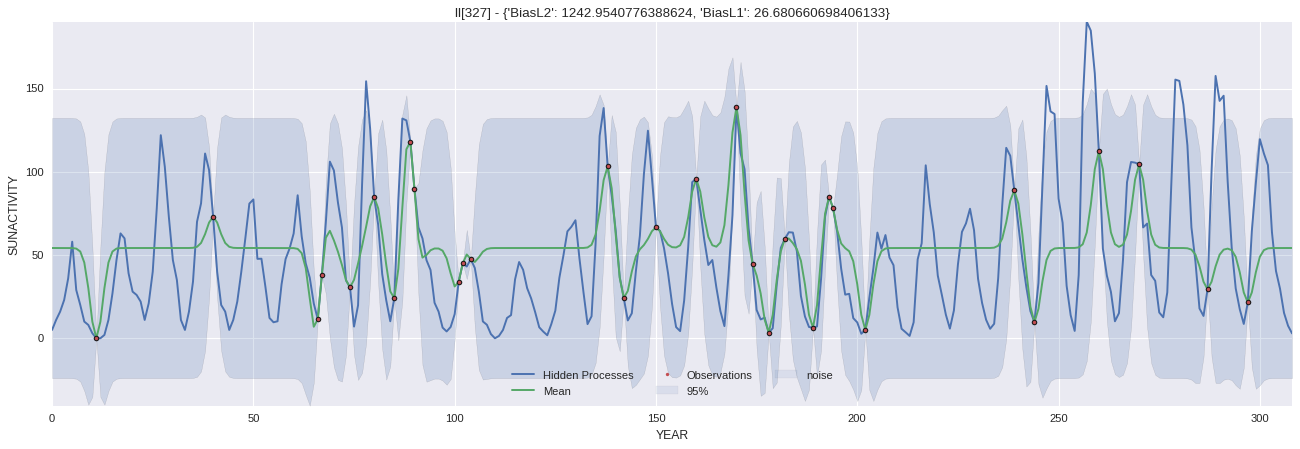

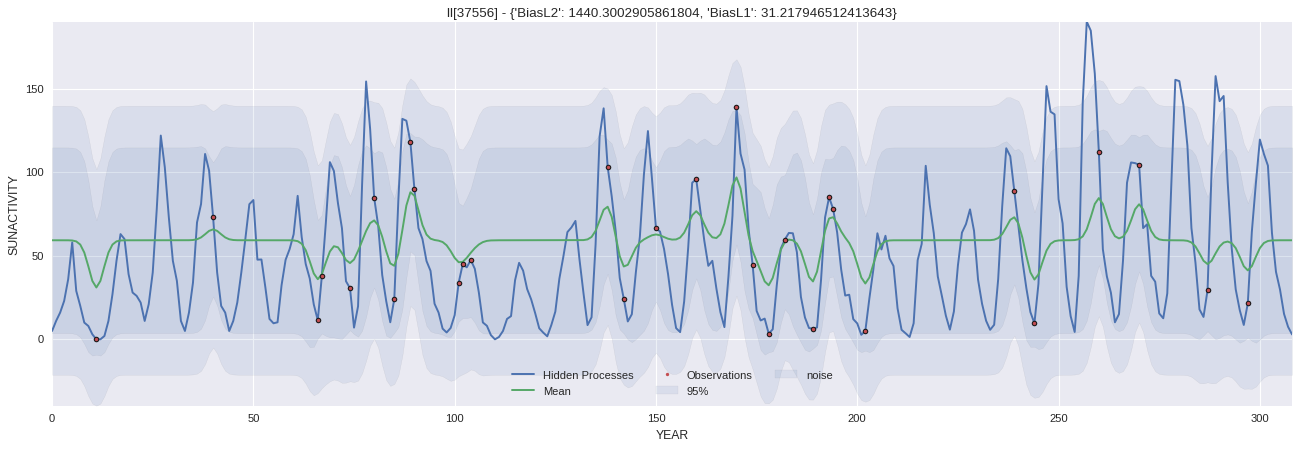

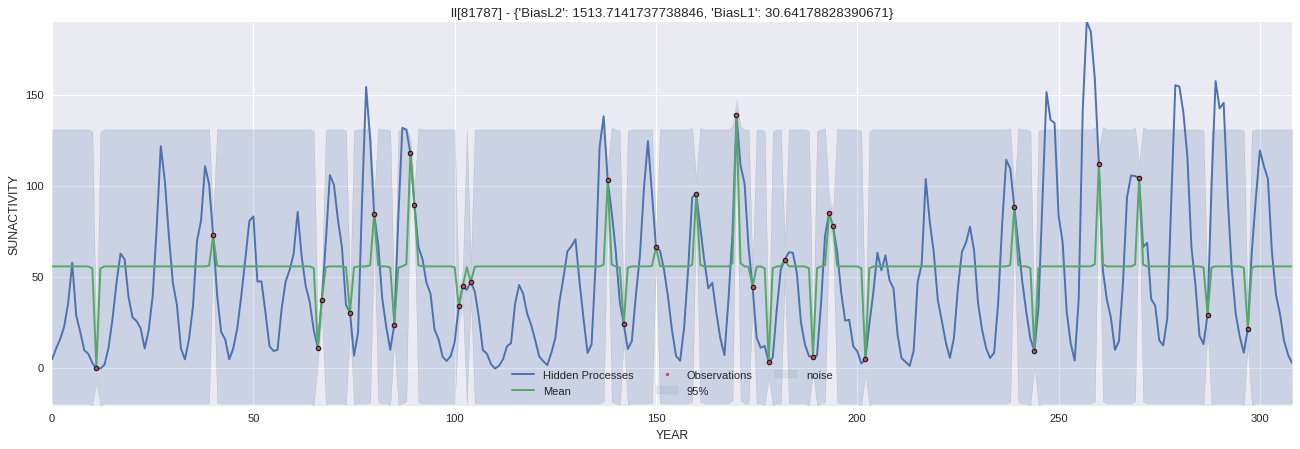

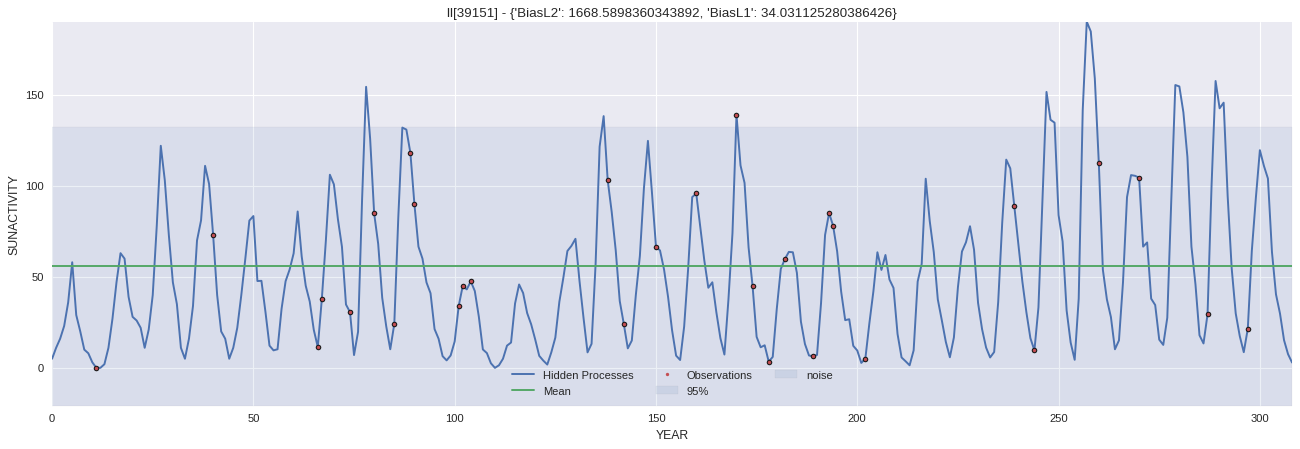

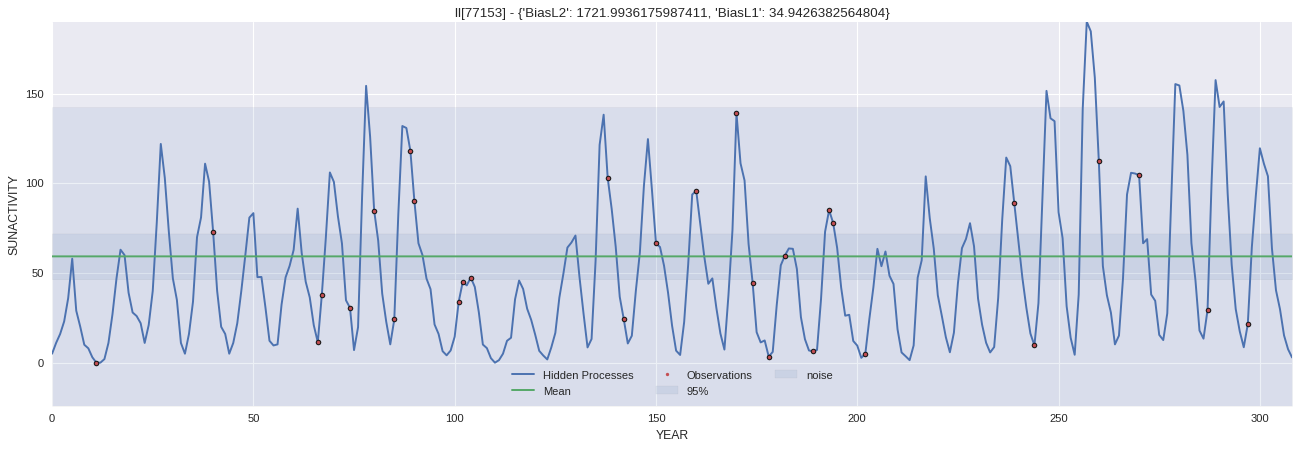

In [23]:
gp.plot_datatrace(candidates)

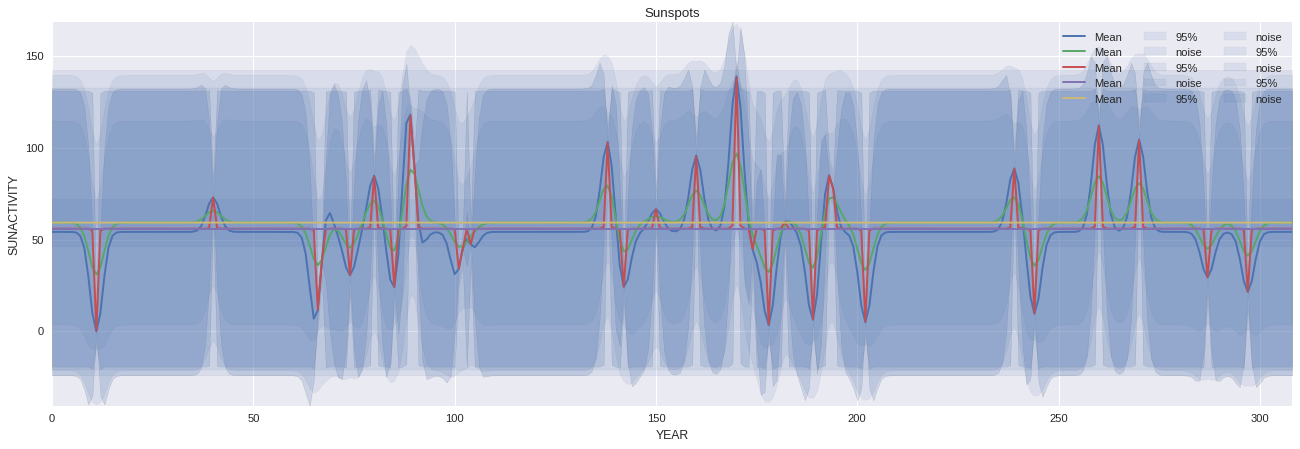

In [24]:
gp.plot_datatrace(candidates, overlap=True, limit=5, var=False, noise=False, samples=0, data=False, loc=True)

## Model Average

In [25]:
average = gp.average(candidates, quantiles=True, quantiles_noise=True)
average

{'BiasL1': 31.50283180631866,
 'BiasL2': 1517.5103991264116,
 'mean': array([ 56.93469238,  56.93469238,  56.93465424,  56.93426514,
         56.93045044,  56.90145111,  56.73238373,  55.99659348,
         53.71788788,  49.01132202,  42.98928452,  29.33412743,
         42.9892807 ,  49.01131058,  53.71787262,  55.9965744 ,
         56.73236084,  56.90142059,  56.93041229,  56.93422318,
         56.93460846,  56.93463898,  56.93463898,  56.93463135,
         56.93463135,  56.93463135,  56.93462372,  56.93462372,
         56.9346199 ,  56.9346199 ,  56.9346199 ,  56.93462372,
         56.93471527,  56.93564987,  56.94312286,  56.98914337,
         57.19985962,  57.8788681 ,  59.32017136,  61.19340134,
         65.37032318,  61.19340134,  59.32016754,  57.87886429,
         57.19985199,  56.98912811,  56.94310379,  56.9356308 ,
         56.93469238,  56.93460083,  56.9345932 ,  56.9345932 ,
         56.93458939,  56.93458939,  56.93458939,  56.93458939,
         56.93458939,  56.93456268,

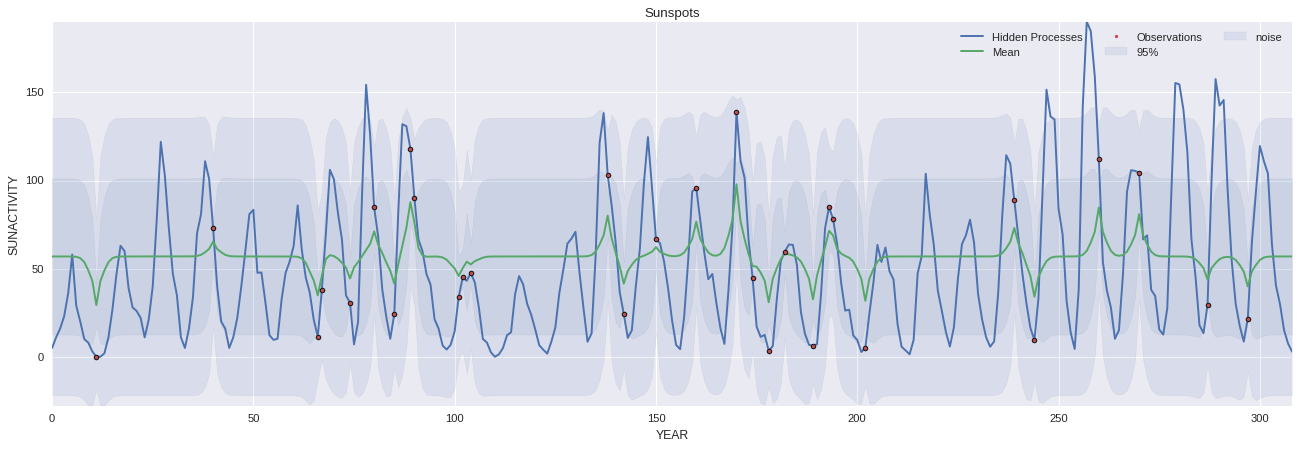

In [26]:
gp.plot(values=average)

## Sampling Particles

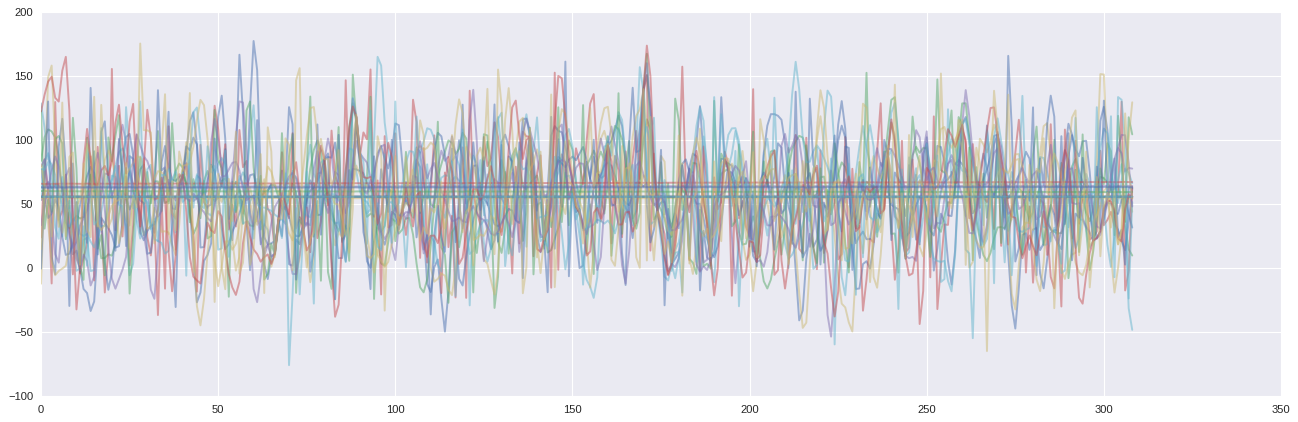

In [27]:
particles = gp.particles(candidates, nsamples=25)
g3.plot(particles, alpha=0.5)

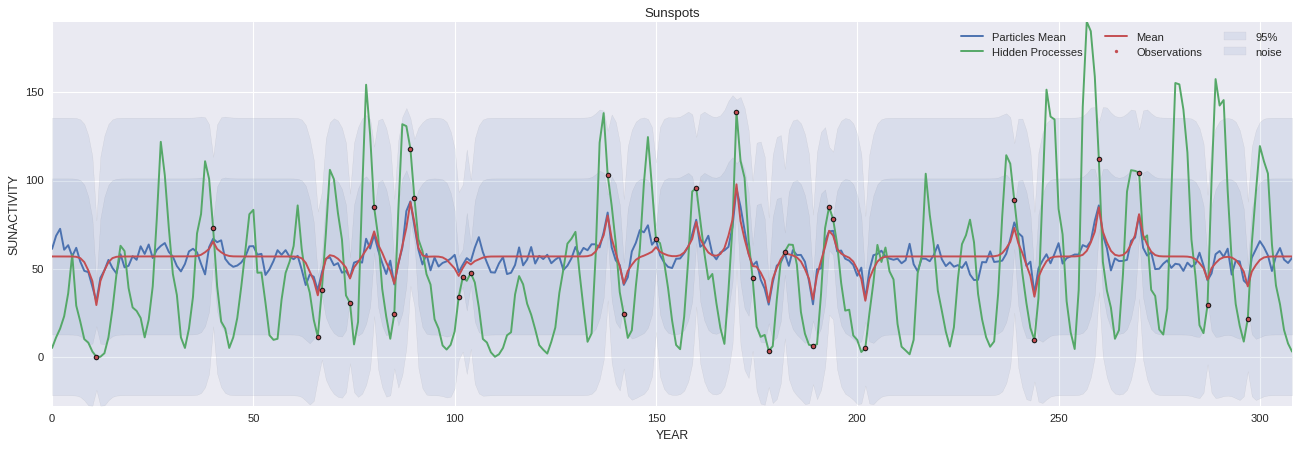

In [28]:
g3.plot(particles.mean(axis=1), label='Particles Mean')
gp.plot(values=average)

## Conditional and Marginal Datatrace as Empirical Distribution

#10000 (10.0 %)


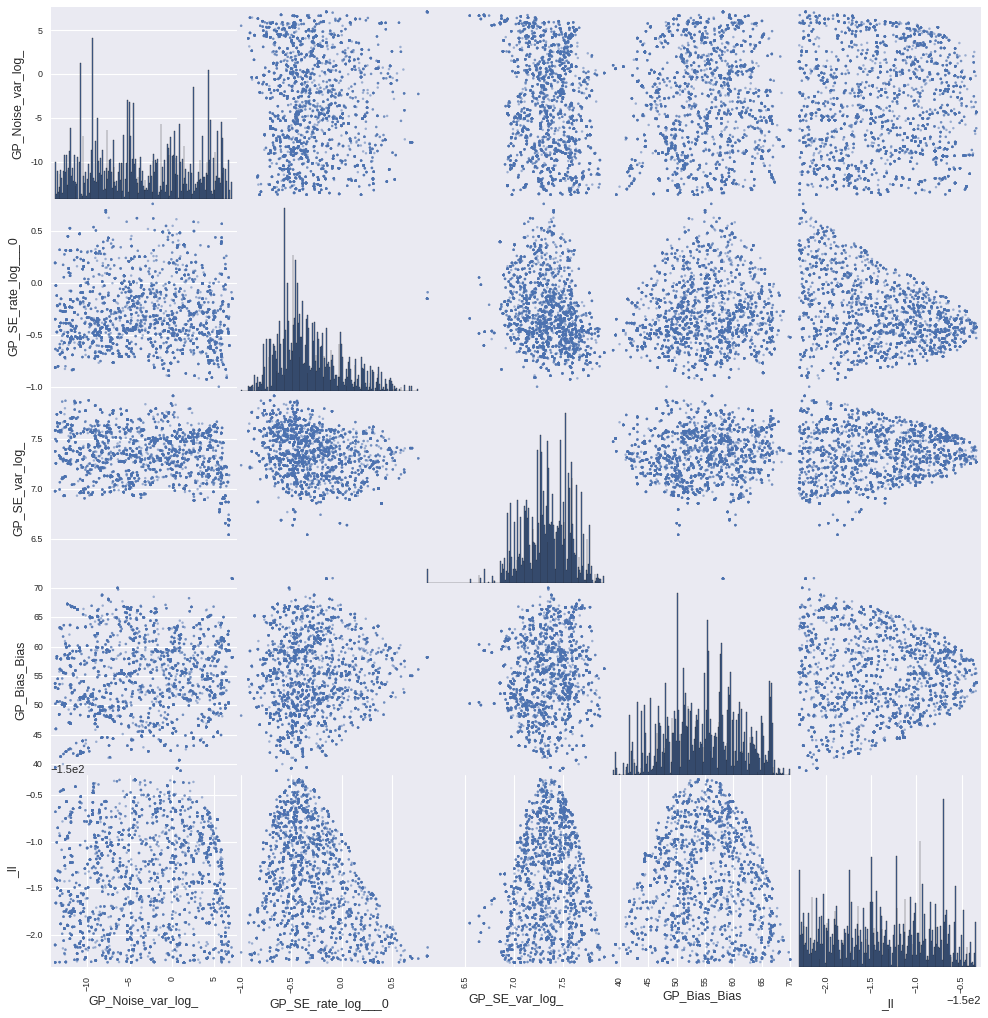

In [29]:
selected = g3.conditional_datatrace(datatrace, lambda df: df._ll > df._ll.quantile(0.9))
selected = g3.marginal_datatrace(selected, drop='_cluster')
g3.scatter_datatrace(selected)

## Kernel Density Estimation of Datatrace for sampling

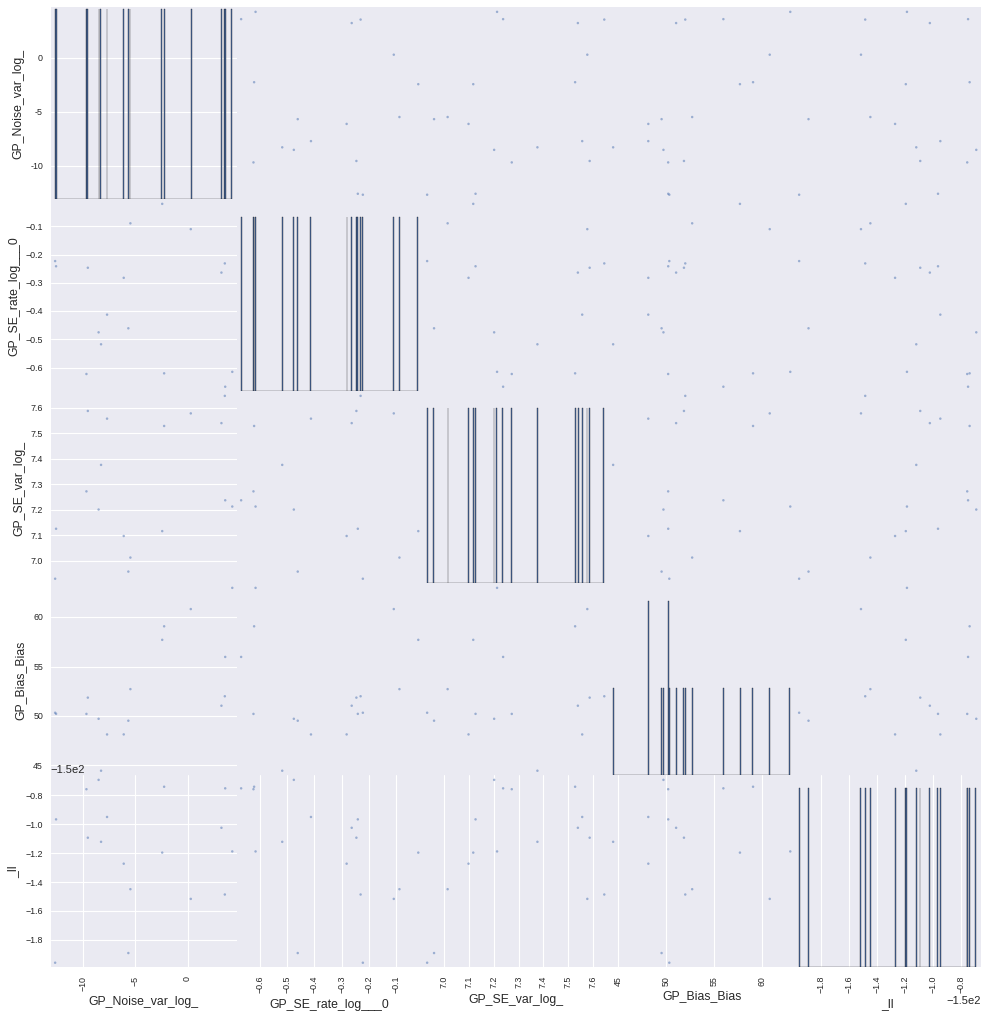

In [30]:
kde = g3.datatrace_to_kde(gp, selected)
models = g3.kde_to_datatrace(gp, kde, nsamples=25)
models = g3.marginal_datatrace(models, drop='_cluster')
g3.scatter_datatrace(models)

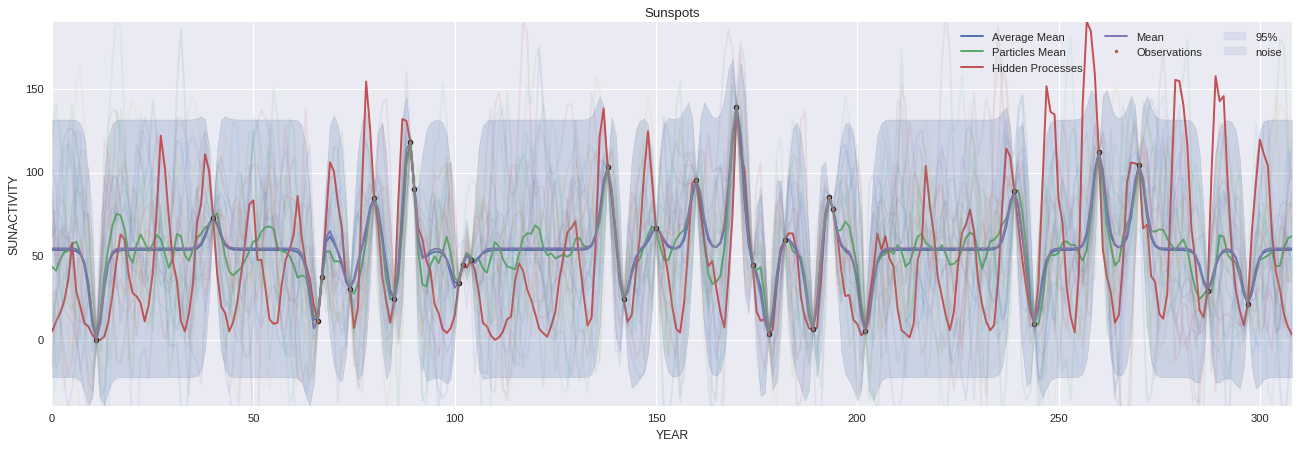

In [52]:
average = gp.average(models, quantiles=True, quantiles_noise=True)
particles = gp.particles(models)

g3.plot(average.mean, label='Average Mean')
g3.plot(particles.mean(axis=1), label='Particles Mean')
gp.plot(params_map)
g3.plot(particles, alpha=0.1)